In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_excel("Detalle precios y productos fabricados 2022.xlsx")

valores_nulos = data.isnull().sum()
valores_nulos


CVE_DOC                      0
FECHA_DOC                    0
NOMBRE_VENDEDOR              2
NOMBRE_CLIENTE               0
CANT                         0
CVE_ART                      0
DESCR                        0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
MARGEN_TOTAL_CALCULADO       0
dtype: int64

In [7]:
#Se limpian los unicos valores nulos
data["NOMBRE_VENDEDOR"] = data["NOMBRE_VENDEDOR"].ffill()

In [9]:
#Se rastrea que columnas se quieren usar con data.info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CANT                       1426 non-null   int64         
 5   CVE_ART                    1426 non-null   object        
 6   DESCR                      1426 non-null   object        
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

In [20]:
cuantitativas = data.iloc[:, [4] + list(range(7, 13))]
cualitativas = data.iloc[:, [0,1,2,3,5,6]]

In [23]:
cuantitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CANT                       1426 non-null   int64  
 1   PRECIO_UNITARIO            1426 non-null   float64
 2   COSTO_UNITARIO             1426 non-null   float64
 3   COSTO_UNITARIO_CALCULADO   1426 non-null   float64
 4   SUBTOTAL_PARTIDA           1426 non-null   float64
 5   COSTO_TOTAL_CALCULADO      1426 non-null   float64
 6   MARGEN_UNITARIO_CALCULADO  1426 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.1 KB


In [24]:
cualitativas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CVE_DOC          1426 non-null   object        
 1   FECHA_DOC        1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR  1426 non-null   object        
 3   NOMBRE_CLIENTE   1426 non-null   object        
 4   CVE_ART          1426 non-null   object        
 5   DESCR            1426 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 67.0+ KB


Diagrama de valores atipicos de cada columna

<Figure size 1500x800 with 0 Axes>

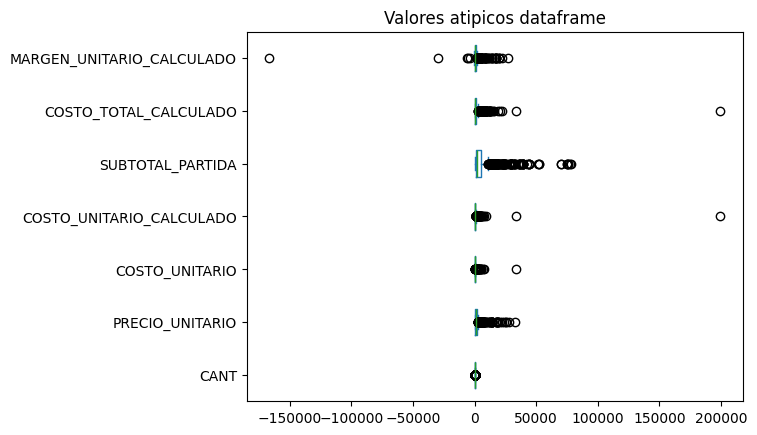

In [25]:
fig = plt.figure(figsize=(15,8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores atipicos dataframe")
plt.show()

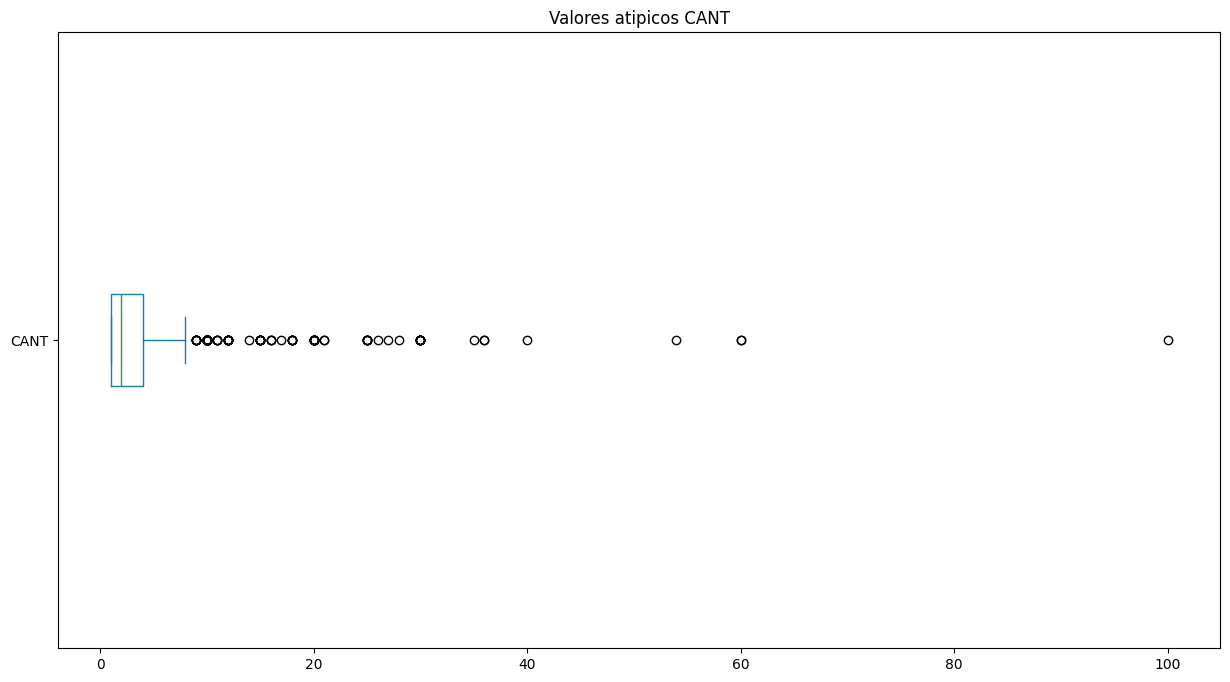

In [39]:
fig = plt.figure(figsize=(15,8))
cuantitativas["CANT"].plot(kind='box', vert=False)
plt.title("Valores atipicos CANT")
plt.show()

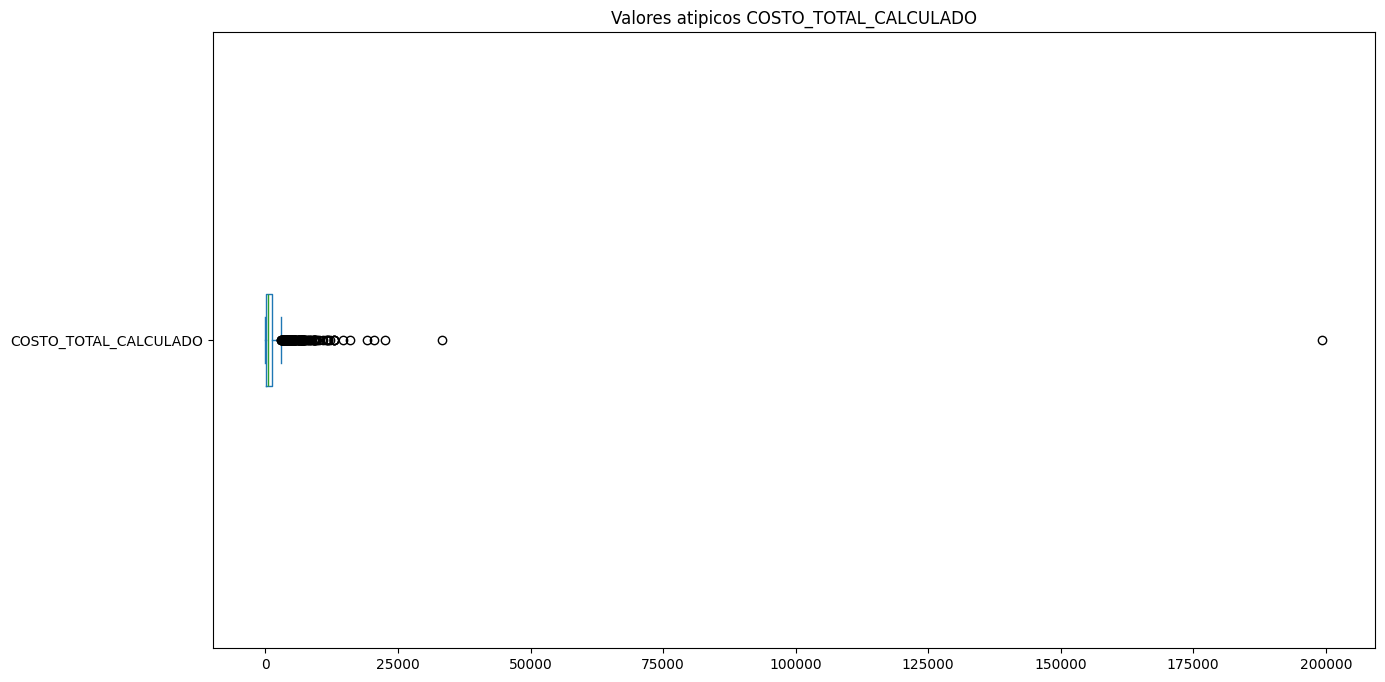

In [40]:
fig = plt.figure(figsize=(15,8))
cuantitativas["COSTO_TOTAL_CALCULADO"].plot(kind='box', vert=False)
plt.title("Valores atipicos COSTO_TOTAL_CALCULADO")
plt.show()

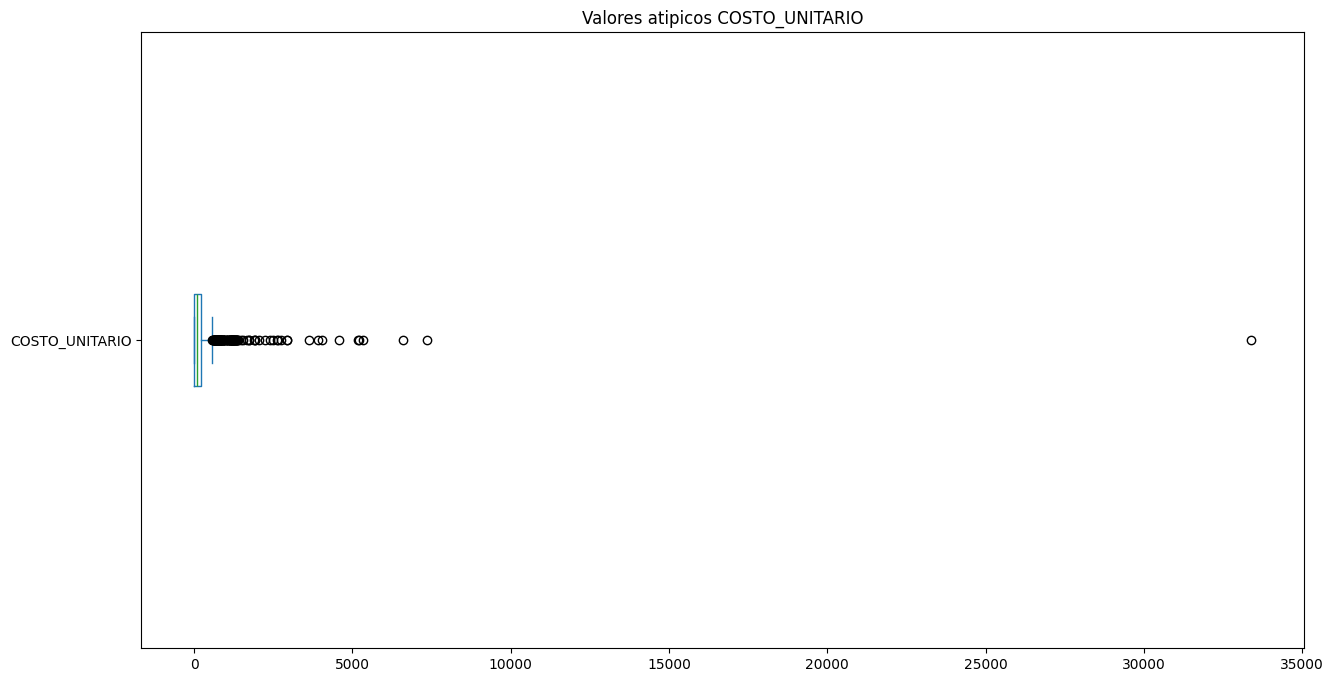

In [41]:
fig = plt.figure(figsize=(15,8))
cuantitativas["COSTO_UNITARIO"].plot(kind='box', vert=False)
plt.title("Valores atipicos COSTO_UNITARIO")
plt.show()

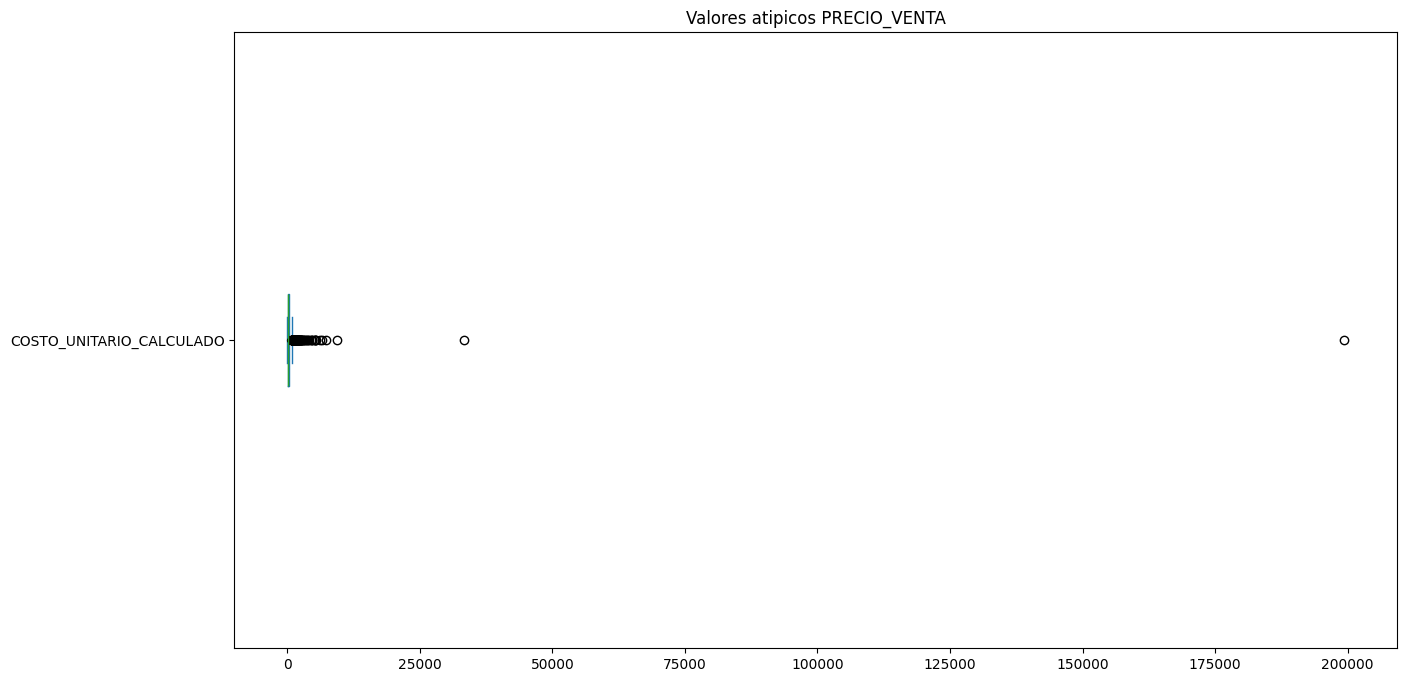

In [42]:
fig = plt.figure(figsize=(15,8))
cuantitativas["COSTO_UNITARIO_CALCULADO"].plot(kind='box', vert=False)
plt.title("Valores atipicos COSTO_UNITARIO_CALCULADO")
plt.show()

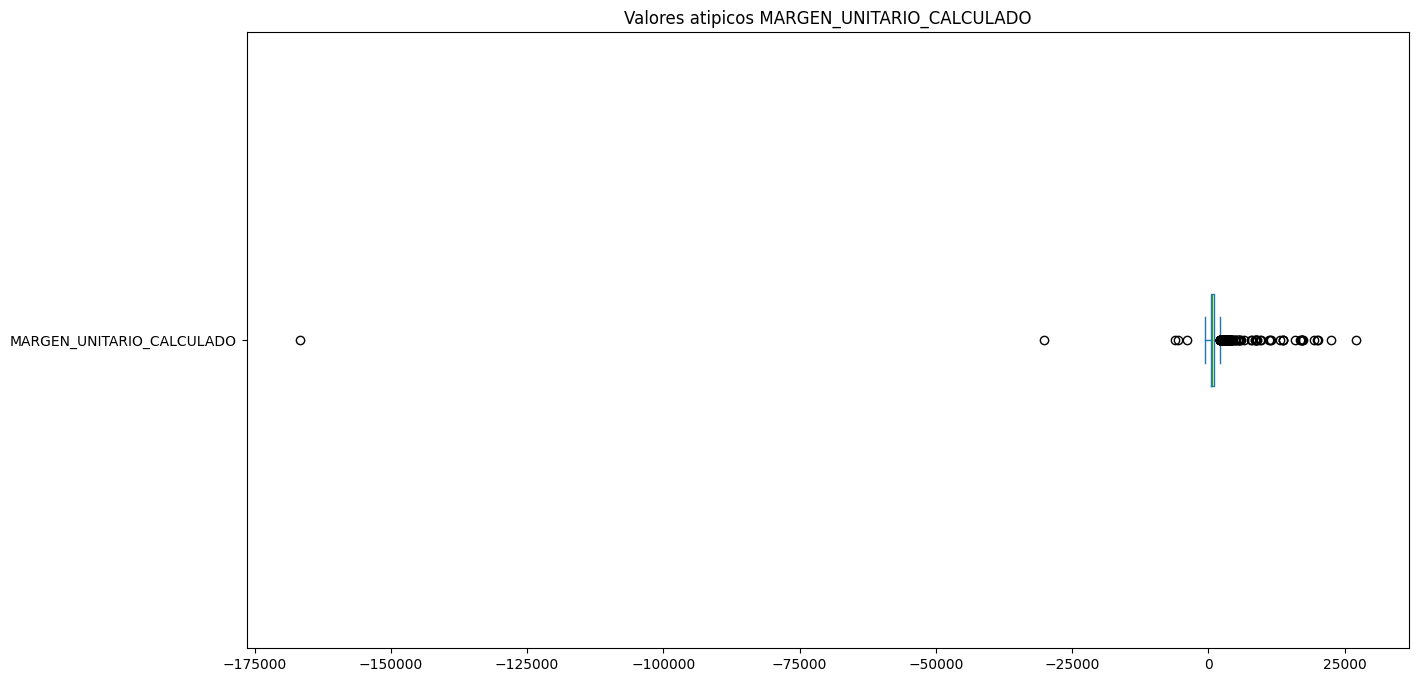

In [43]:
fig = plt.figure(figsize=(15,8))
cuantitativas["MARGEN_UNITARIO_CALCULADO"].plot(kind='box', vert=False)
plt.title("Valores atipicos MARGEN_UNITARIO_CALCULADO")
plt.show()

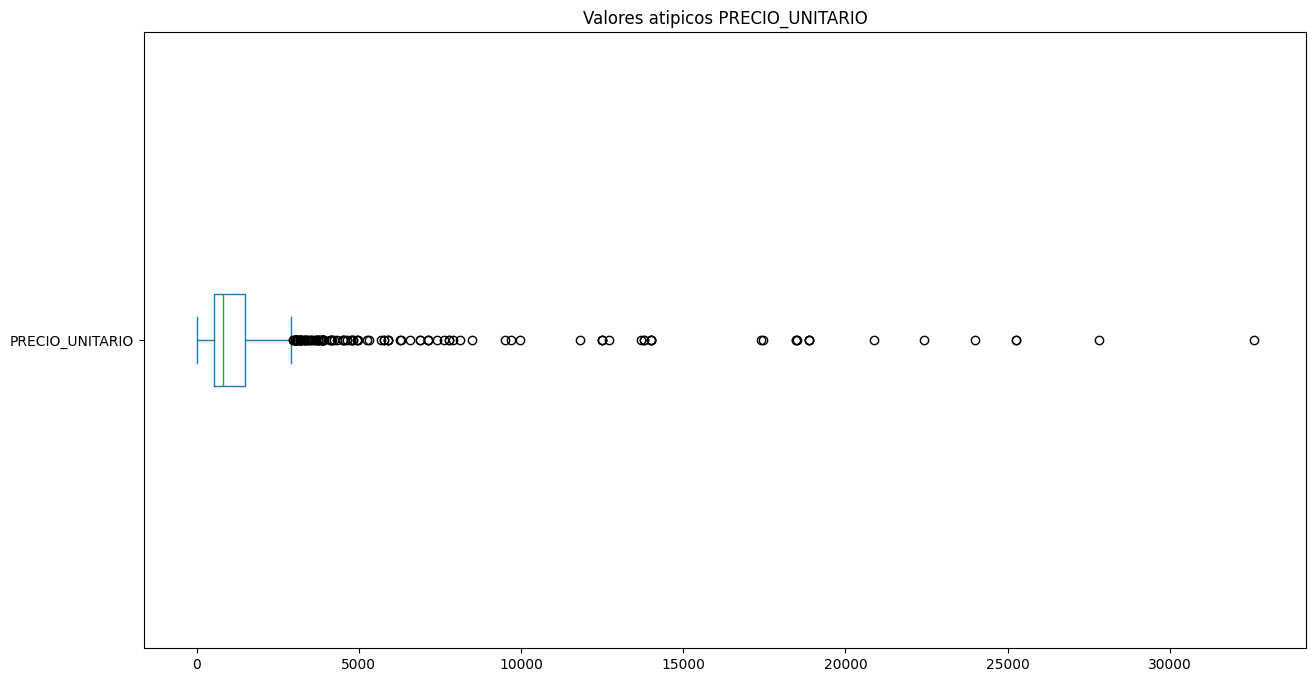

In [44]:
fig = plt.figure(figsize=(15,8))
cuantitativas["PRECIO_UNITARIO"].plot(kind='box', vert=False)
plt.title("Valores atipicos PRECIO_UNITARIO")
plt.show()

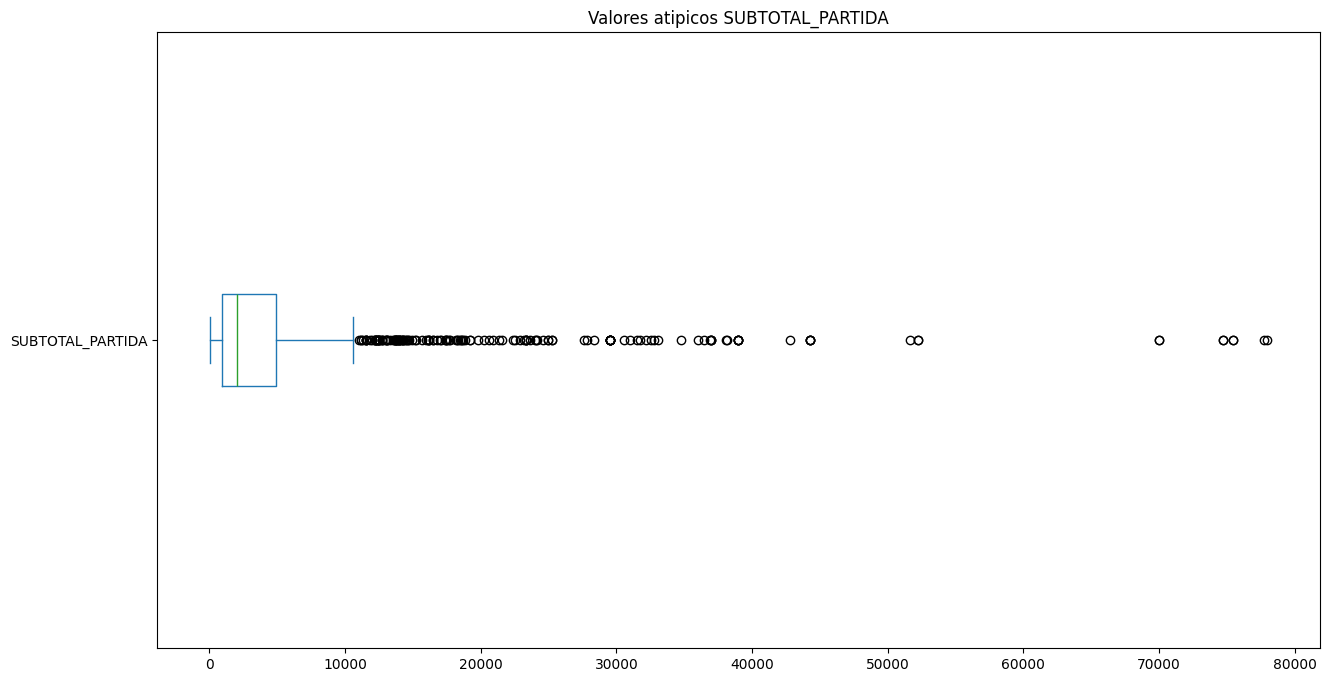

In [45]:
fig = plt.figure(figsize=(15,8))
cuantitativas["SUBTOTAL_PARTIDA"].plot(kind='box', vert=False)
plt.title("Valores atipicos SUBTOTAL_PARTIDA")
plt.show()

Desviacion estandar

In [26]:
#Utilizando desviación estandar
y = cuantitativas
limiteSuperior = y.mean() + 3*y.std()
limiteInferior = y.mean() - 3*y.std()
print("------------Limite superior permitido------------ \n", limiteSuperior)
print("------------Limite inferior permitido------------ \n", limiteInferior)

------------Limite superior permitido------------ 
 CANT                            22.531793
PRECIO_UNITARIO               9533.970813
COSTO_UNITARIO                3313.473534
COSTO_UNITARIO_CALCULADO     16686.790475
SUBTOTAL_PARTIDA             31402.663810
COSTO_TOTAL_CALCULADO        18629.377526
MARGEN_UNITARIO_CALCULADO    16001.398440
dtype: float64
------------Limite inferior permitido------------ 
 CANT                           -14.324219
PRECIO_UNITARIO              -6499.204684
COSTO_UNITARIO               -2821.614250
COSTO_UNITARIO_CALCULADO    -15603.765678
SUBTOTAL_PARTIDA            -21404.897036
COSTO_TOTAL_CALCULADO       -15803.336348
MARGEN_UNITARIO_CALCULADO   -14049.656995
dtype: float64


In [27]:
#Obtenemos datos y los outliers se convierten en nulos en el dataframe
data3 = cuantitativas[(y<=limiteSuperior) & (y>=limiteInferior)]

In [28]:
valoresNulos = data3.isnull().sum()
valoresNulos

CANT                         28
PRECIO_UNITARIO              29
COSTO_UNITARIO               10
COSTO_UNITARIO_CALCULADO      2
SUBTOTAL_PARTIDA             36
COSTO_TOTAL_CALCULADO         5
MARGEN_UNITARIO_CALCULADO    13
dtype: int64

In [29]:
# Haciendo una copia y rellenando  los valores nulos
dataClean = data3.copy()
dataClean = dataClean.fillna(round(data3.mean(), 1))
dataClean

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,1.0,5909.84,1884.35,1884.35,5909.84,1884.35,4025.49


In [30]:
valoresNulos = dataClean.isnull().sum()
valoresNulos

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
dtype: int64

Utilizando quantiles para encontrar los valores atipicos

In [31]:
#Metodo aplicando cuartiles. Encuentro cuartiles 0.25 y 0.75

percentile25 = y.quantile(0.25) #q1
percentile75 = y.quantile(0.75) #q3
iqr = percentile75 - percentile25

limiteSuperiorIQR = percentile75 + 1.5*iqr
limiteInferiorIQR = percentile25 - 1.5*iqr
print("Limite superior permitido", limiteSuperiorIQR)
print("Limite inferior permitido", limiteInferiorIQR)

Limite superior permitido CANT                             8.50000
PRECIO_UNITARIO               2954.86625
COSTO_UNITARIO                 567.95000
COSTO_UNITARIO_CALCULADO       807.81375
SUBTOTAL_PARTIDA             10783.51250
COSTO_TOTAL_CALCULADO         2971.36250
MARGEN_UNITARIO_CALCULADO     2089.94625
dtype: float64
Limite inferior permitido CANT                           -3.50000
PRECIO_UNITARIO              -927.40375
COSTO_UNITARIO               -340.77000
COSTO_UNITARIO_CALCULADO     -340.87625
SUBTOTAL_PARTIDA            -4946.78750
COSTO_TOTAL_CALCULADO       -1506.25750
MARGEN_UNITARIO_CALCULADO    -621.22375
dtype: float64


In [32]:
#Obtenemos datos limpios del dataframe
data3_iqr = cuantitativas[(y<=limiteSuperiorIQR)&(y>=limiteInferiorIQR)]
data3_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,1.0,NaN,NaN,NaN,5909.84,1884.35,NaN


In [33]:
valores_nulos = data3_iqr.isnull().sum()
valores_nulos

CANT                         169
PRECIO_UNITARIO              127
COSTO_UNITARIO               128
COSTO_UNITARIO_CALCULADO     144
SUBTOTAL_PARTIDA             159
COSTO_TOTAL_CALCULADO        162
MARGEN_UNITARIO_CALCULADO    132
dtype: int64

In [34]:
data4_iqr = data3_iqr.copy()
data4_iqr = data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,CANT,PRECIO_UNITARIO,COSTO_UNITARIO,COSTO_UNITARIO_CALCULADO,SUBTOTAL_PARTIDA,COSTO_TOTAL_CALCULADO,MARGEN_UNITARIO_CALCULADO
0,1.0,434.48,52.80,52.80,434.48,52.80,381.68
1,1.0,1264.05,327.18,327.18,1264.05,327.18,936.87
2,7.0,551.61,177.68,177.68,3861.29,1243.73,373.94
3,1.0,140.00,38.96,38.96,140.00,38.96,101.04
4,2.0,172.41,101.71,101.71,344.83,203.42,70.71
...,...,...,...,...,...,...,...
1421,6.0,712.00,102.31,102.31,4272.00,613.88,609.69
1422,6.0,718.60,104.69,104.69,4311.60,628.12,613.91
1423,3.0,2182.35,0.00,596.55,6547.05,1789.64,1585.80
1424,1.0,942.70,108.00,219.90,5909.84,1884.35,684.80


In [35]:
valores_nulos = data4_iqr.isnull().sum()
valores_nulos

CANT                         0
PRECIO_UNITARIO              0
COSTO_UNITARIO               0
COSTO_UNITARIO_CALCULADO     0
SUBTOTAL_PARTIDA             0
COSTO_TOTAL_CALCULADO        0
MARGEN_UNITARIO_CALCULADO    0
dtype: int64

In [37]:
#Unir el dataframe cuantitativo limpio con el dataframe cualitativo

datos_Limpios = pd.concat([cualitativas, data4_iqr], axis=1)
datos_Limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   CVE_DOC                    1426 non-null   object        
 1   FECHA_DOC                  1426 non-null   datetime64[ns]
 2   NOMBRE_VENDEDOR            1426 non-null   object        
 3   NOMBRE_CLIENTE             1426 non-null   object        
 4   CVE_ART                    1426 non-null   object        
 5   DESCR                      1426 non-null   object        
 6   CANT                       1426 non-null   float64       
 7   PRECIO_UNITARIO            1426 non-null   float64       
 8   COSTO_UNITARIO             1426 non-null   float64       
 9   COSTO_UNITARIO_CALCULADO   1426 non-null   float64       
 10  SUBTOTAL_PARTIDA           1426 non-null   float64       
 11  COSTO_TOTAL_CALCULADO      1426 non-null   float64       
 12  MARGEN

Comprobacion con valores de caja

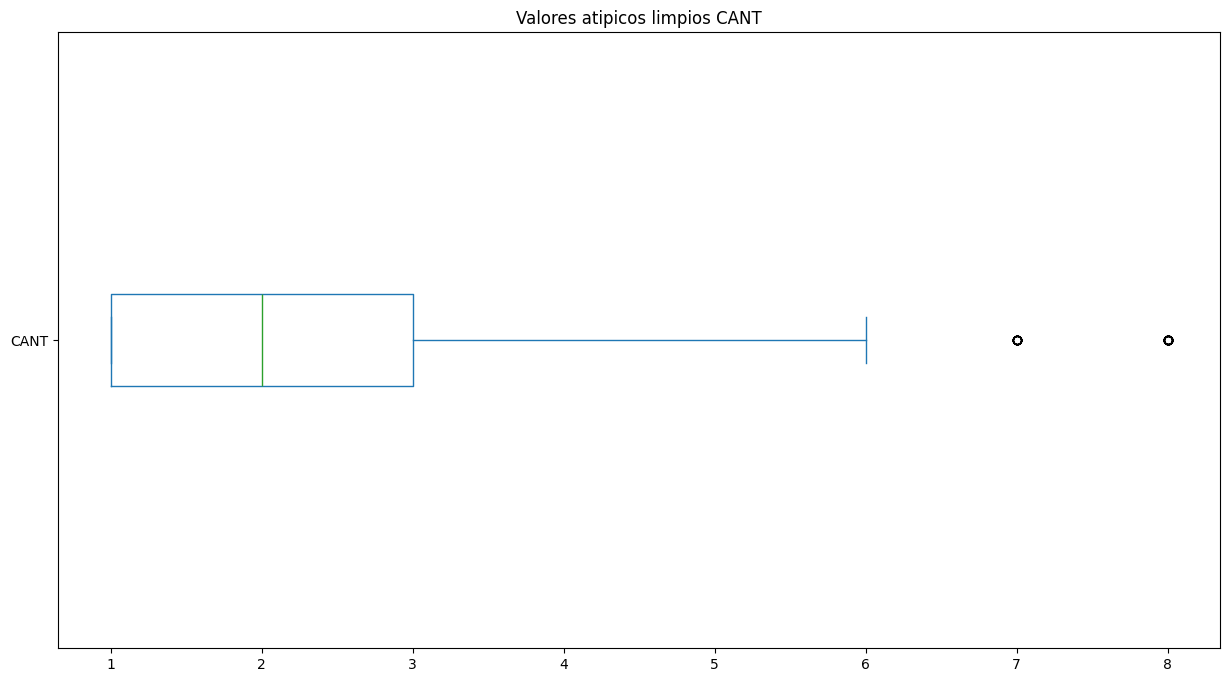

In [46]:
fig = plt.figure(figsize=(15,8))
datos_Limpios["CANT"].plot(kind='box', vert=False)
plt.title("Valores atipicos limpios CANT")
plt.show()

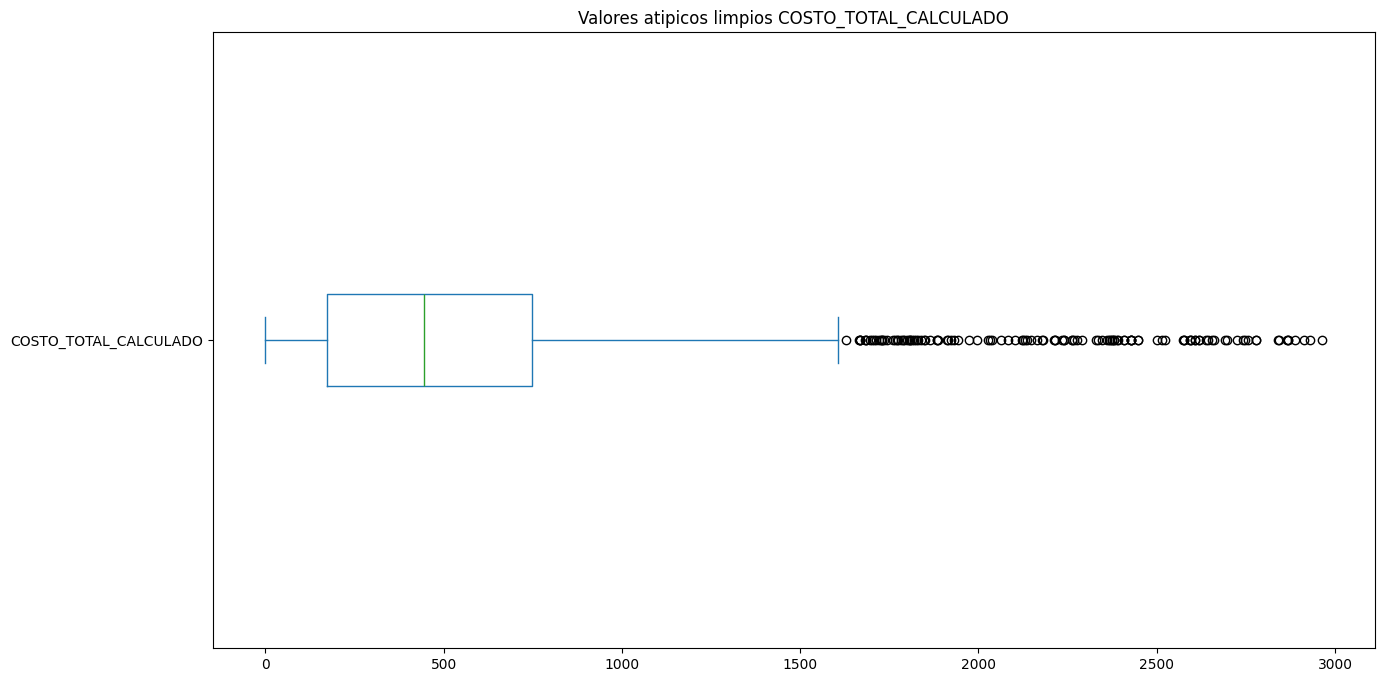

In [47]:
fig = plt.figure(figsize=(15,8))
datos_Limpios["COSTO_TOTAL_CALCULADO"].plot(kind='box', vert=False)
plt.title("Valores atipicos limpios COSTO_TOTAL_CALCULADO")
plt.show()

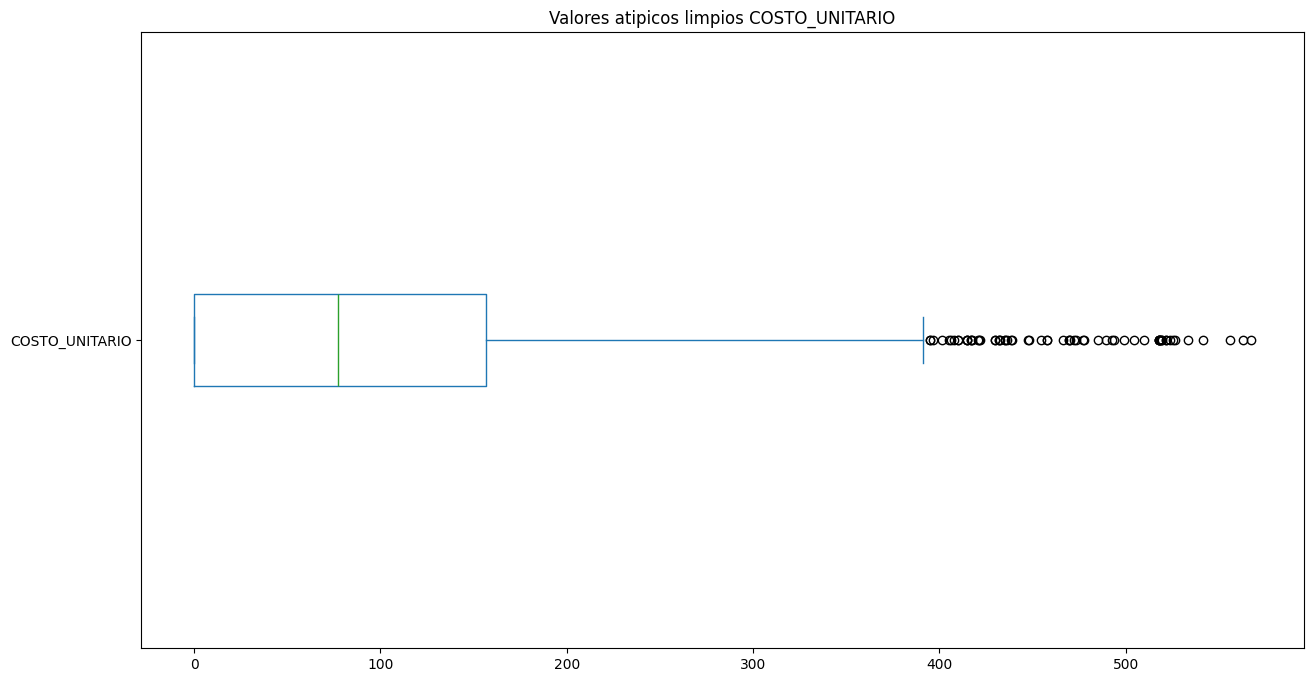

In [48]:
fig = plt.figure(figsize=(15,8))
datos_Limpios["COSTO_UNITARIO"].plot(kind='box', vert=False)
plt.title("Valores atipicos limpios COSTO_UNITARIO")
plt.show()

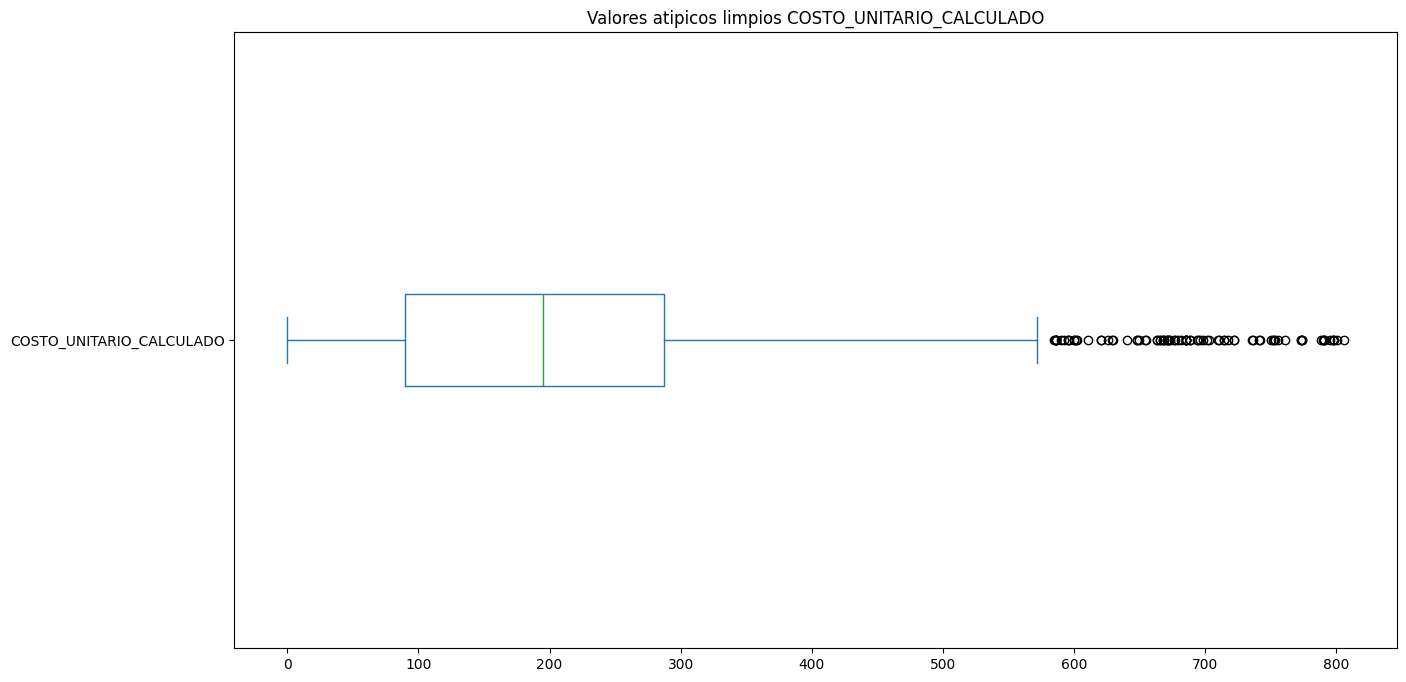

In [49]:
fig = plt.figure(figsize=(15,8))
datos_Limpios["COSTO_UNITARIO_CALCULADO"].plot(kind='box', vert=False)
plt.title("Valores atipicos limpios COSTO_UNITARIO_CALCULADO")
plt.show()

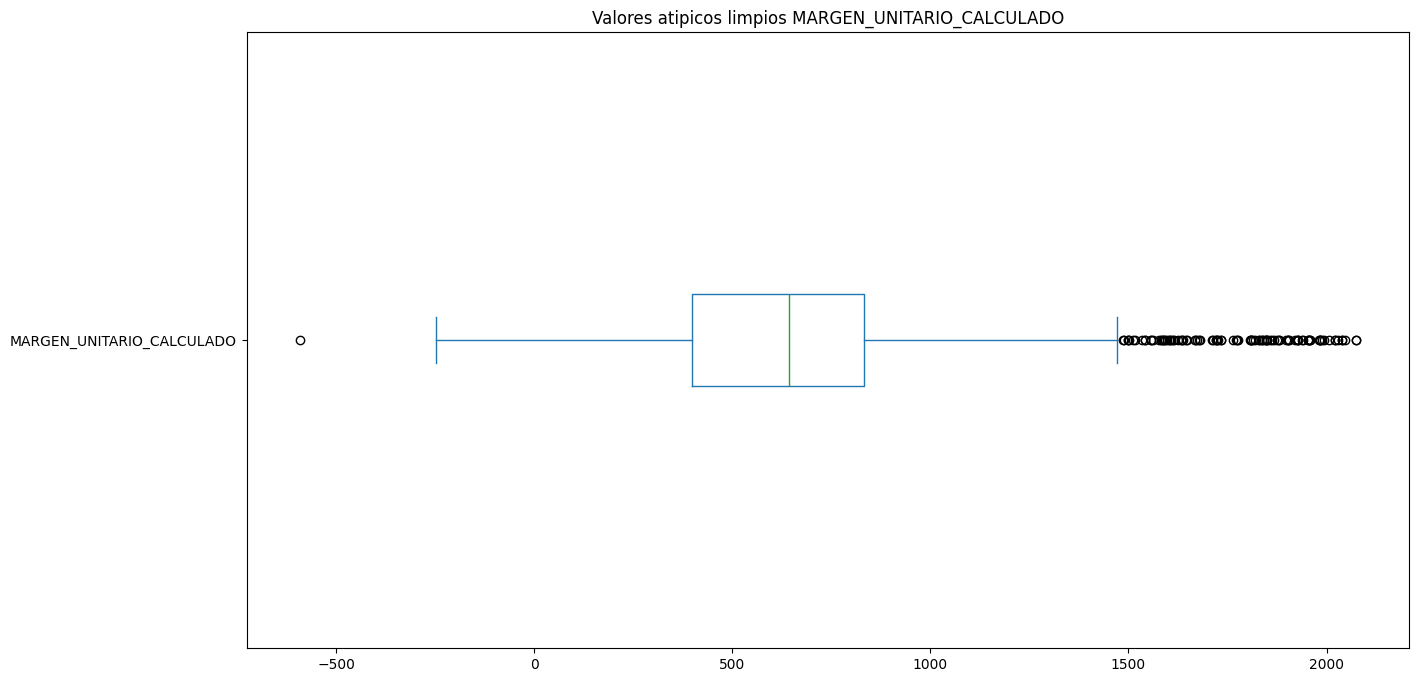

In [50]:
fig = plt.figure(figsize=(15,8))
datos_Limpios["MARGEN_UNITARIO_CALCULADO"].plot(kind='box', vert=False)
plt.title("Valores atipicos limpios MARGEN_UNITARIO_CALCULADO")
plt.show()

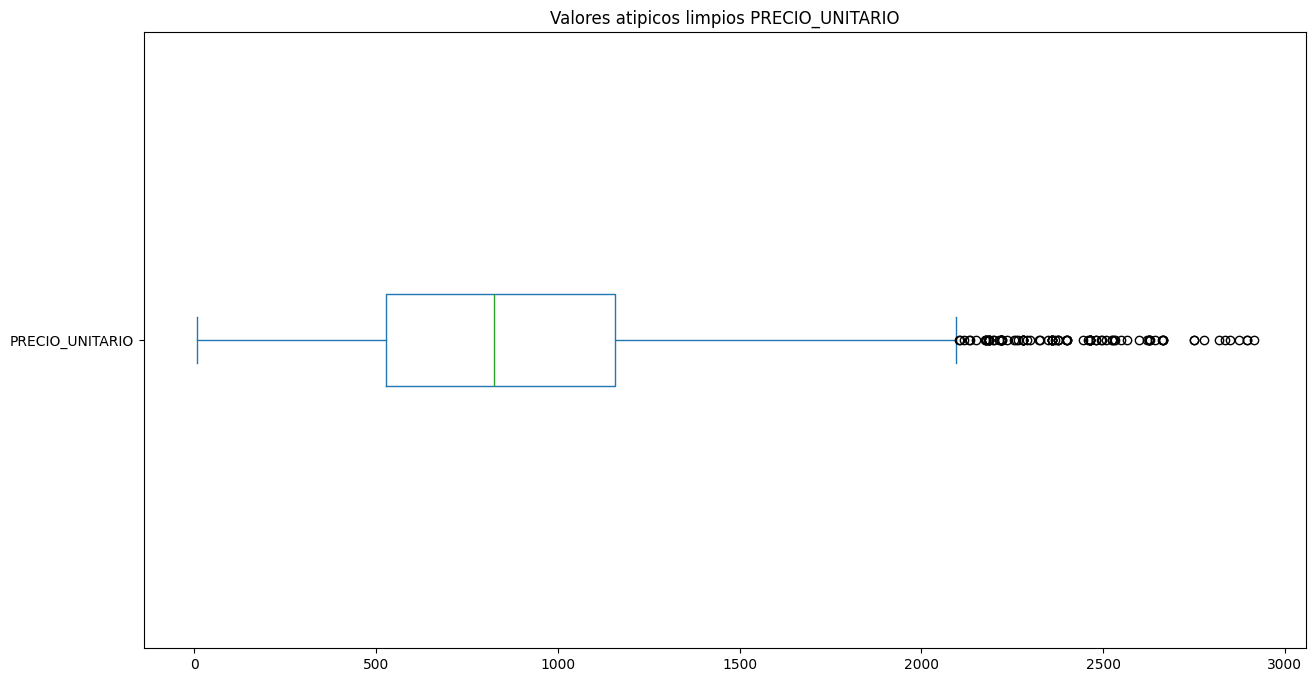

In [51]:
fig = plt.figure(figsize=(15,8))
datos_Limpios["PRECIO_UNITARIO"].plot(kind='box', vert=False)
plt.title("Valores atipicos limpios PRECIO_UNITARIO")
plt.show()

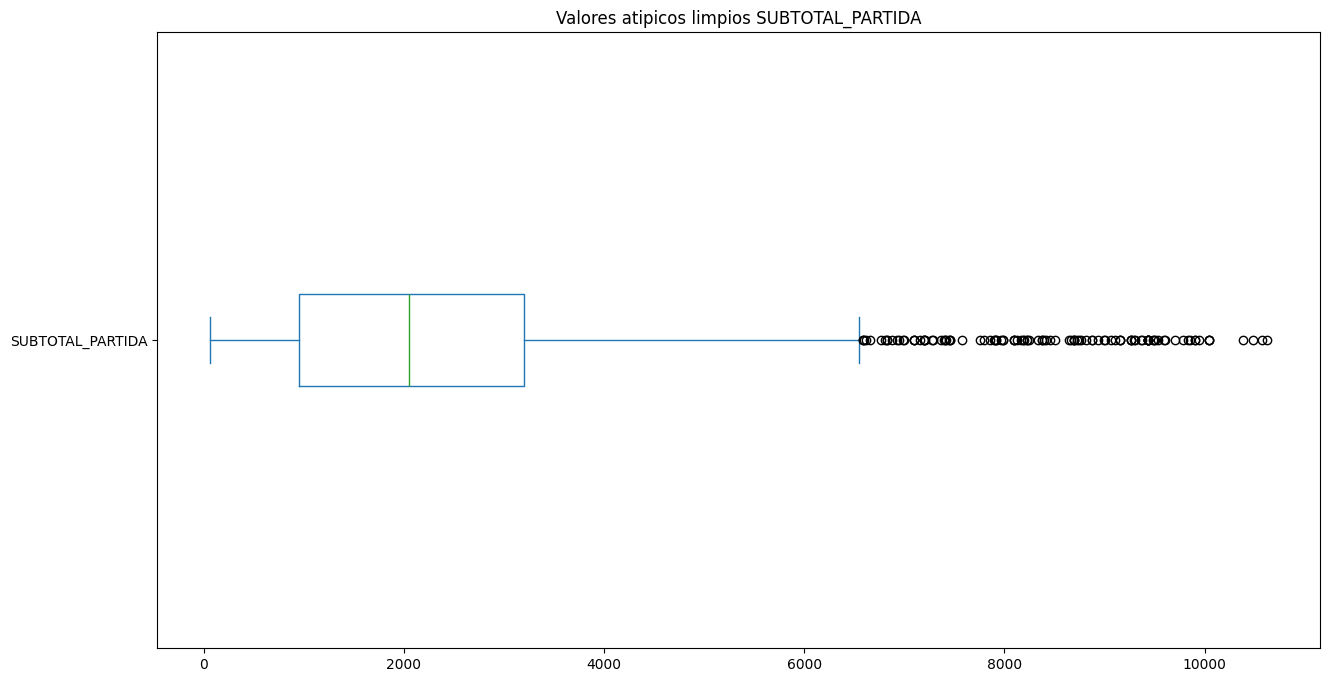

In [52]:
fig = plt.figure(figsize=(15,8))
datos_Limpios["SUBTOTAL_PARTIDA"].plot(kind='box', vert=False)
plt.title("Valores atipicos limpios SUBTOTAL_PARTIDA")
plt.show()

In [53]:
datos_Limpios.to_csv("Detalle precios y productos 2022 limpio.csv")